In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [170]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=6 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [171]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [172]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= r"C:\Users\nayak\Code For Good\Team-15\Emotion Detection\train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 3995 images belonging to 6 classes.


{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5}

In [173]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= r"C:\Users\nayak\Code For Good\Team-15\Emotion Detection\test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 903 images belonging to 6 classes.


# visualizaing the data that is fed to train data gen

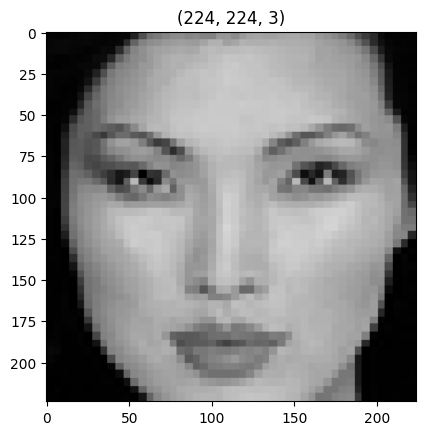

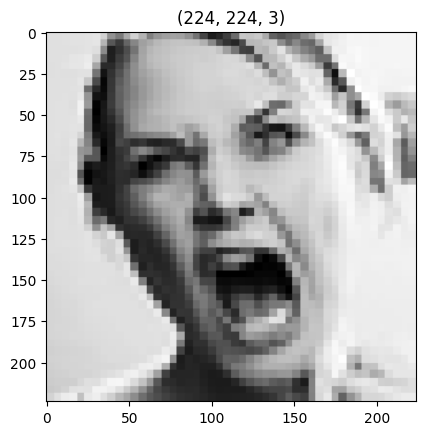

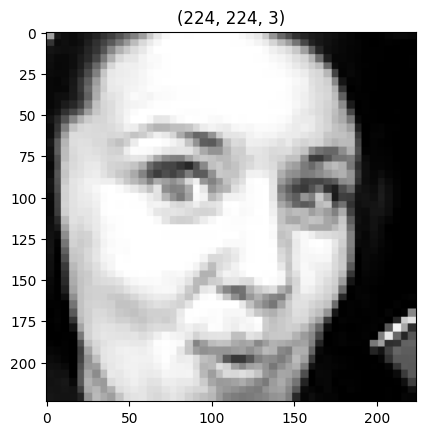

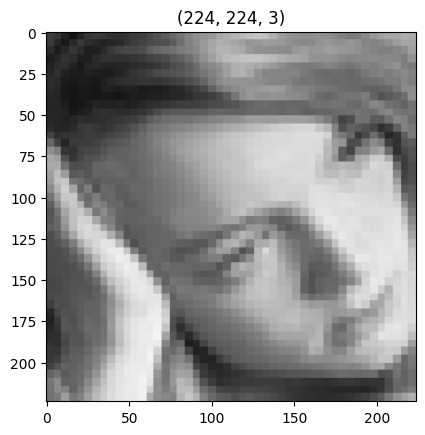

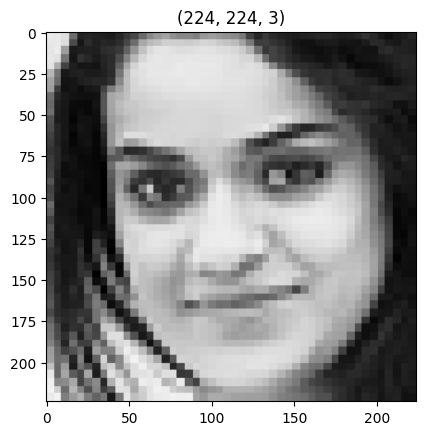

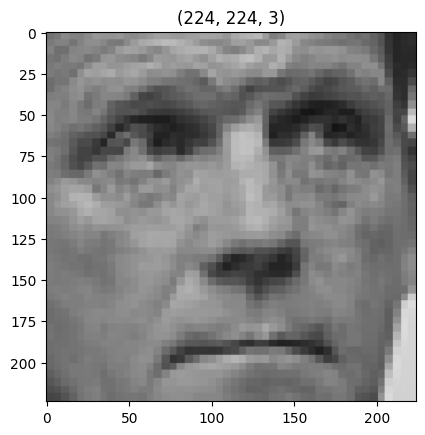

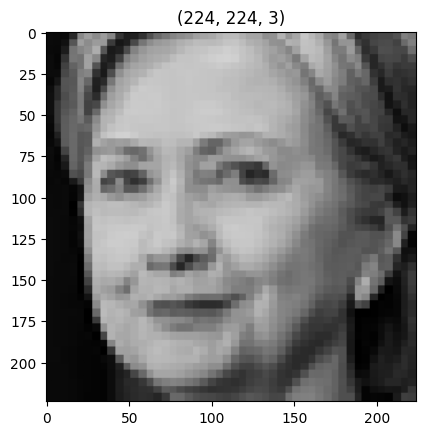

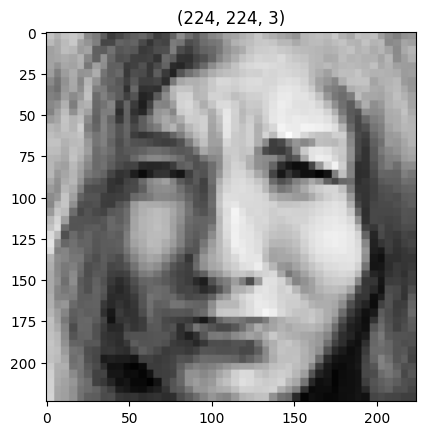

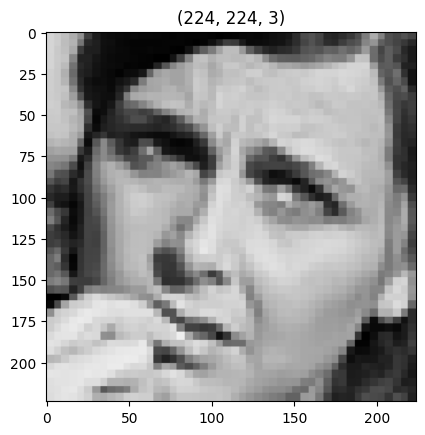

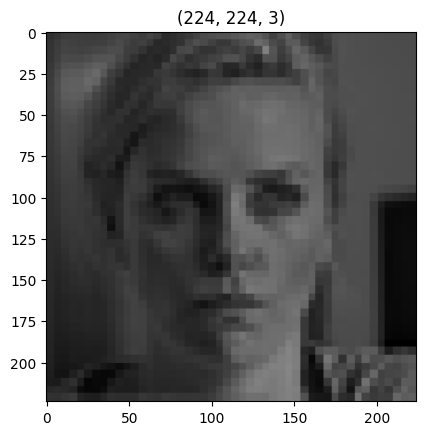

In [174]:
# to visualize the images in the traing data denerator 

t_img , label = val_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [175]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 7, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [176]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 20, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\nayak\AppData\Local\Temp\ipykernel_2020\61504346.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
20/20 [==============================] - ETA: 0s - loss: 14.7571 - accuracy: 0.2203
Epoch 1: val_accuracy improved from -inf to 0.20312, saving model to best_model.h5
20/20 [==============================] - 21s 987ms/step - loss: 14.7571 - accuracy: 0.2203 - val_loss: 13.7238 - val_accuracy: 0.2031
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: 6.5907 - accuracy: 0.3781
Epoch 2: val_accuracy did not improve from 0.20312
20/20 [==============================] - 19s 937ms/step - loss: 6.5907 - accuracy: 0.3781 - val_loss: 10.3447 - val_accuracy: 0.1719
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: 6.0679 - accuracy: 0.3641
Epoch 3: val_accuracy improved from 0.20312 to 0.21094, saving model to best_model.h5
20/20 [==============================] - 19s 969ms/step - loss: 6.0679 - accuracy: 0.3641 - val_loss: 12.4282 - val_accuracy: 0.2109
Epoch 4/30
20/20 [==============================] - ETA: 0s - loss: 6.8075 - accuracy: 0.3701
Epo

In [177]:
# Loading the best fit model 
from keras.models import load_model
model = load_model(r"C:\Users\nayak\Code For Good\Team-15\Emotion Detection\Emotion-detection-main\best_model.h5")

In [178]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

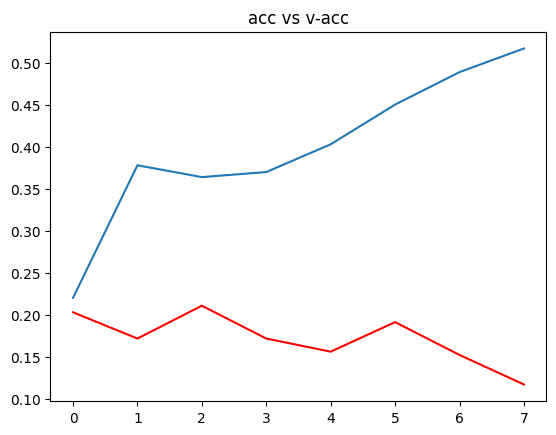

In [179]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

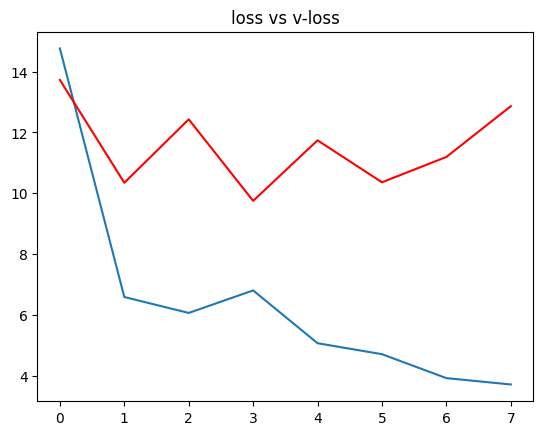

In [180]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [191]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
print(op)

{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad'}


1/1 [==============================] - 0s 57ms/step
 the image is of 3


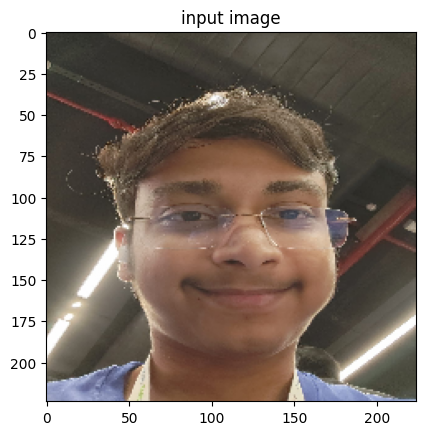

In [190]:
# path for the image to see if it predics correct class

path = r"C:\Users\nayak\Code For Good\Team-15\Emotion Detection\test\1.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()